In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cmocean as cmo
import os,sys,fnmatch,time
import numpy as np

from salishsea_tools.nc_tools import scDataset

%matplotlib inline

In [2]:
def get_files(dirname, fname, grid):
    files = []    
    for item in os.listdir(dirname):
        if fnmatch.fnmatchcase(item, fname + grid + "*.nc"):
            files += [os.path.join(dirname, item)]
    files.sort(key=os.path.basename)
    return files

# ------------------------------------------------------------------------------------------------
def get_vars(dirname, version):
    '''from analysis-michael/raw/tip/notebooks/FraserFlow.ipynb
    '''
    if version == 'parent':
        fname = "MCKNZ_1h_20170101_20170120_*"
    elif version == 'child':
        fname = "1_MCKNZ_1h_20170101_20170120_*"
    
    s = slice(1,-1,None)
    time_ind = 300
    
    filesT = get_files(dirname, fname, 'grid_T')
    filesU = get_files(dirname, fname, 'grid_U')        
    filesV = get_files(dirname, fname, 'grid_V')
    filesW = get_files(dirname, fname, 'grid_W')
            
    with scDataset(filesT) as dsT, scDataset(filesU) as dsU, scDataset(filesV) as dsV, scDataset(filesW) as dsW:
        lat = dsT.variables['nav_lat'][s,s]
        lon = dsT.variables['nav_lon'][s,s]
        deptht = dsT.variables['deptht'][:]
        sossheig = dsT.variables['sossheig'][time_ind,s,s]
        votemper = dsT.variables['votemper'][time_ind,:,s,s]
        vozocrtx = dsU.variables['vozocrtx'][time_ind,:,s,s]
        sozotaux = dsU.variables['sozotaux'][:,s,s]
        vomecrty = dsV.variables['vomecrty'][time_ind,:,s,s]
        sometauy = dsV.variables['sometauy'][:,s,s]
        vovecrtz = dsW.variables['vovecrtz'][time_ind,:,s,s]
    
    return lat, lon, deptht, sossheig, votemper, vozocrtx, sozotaux, vomecrty, sometauy, vovecrtz

# ------------------------------------------------------------------------------------------------
def plot_varb(fig, axa, axb, varb, depth_ind, vm, cmap, ttl, version):
    cmap.set_bad('wheat')
    if version == 'parent':
        cross_ind = int(varb.shape[-1]/2)
    elif version == 'child':
        cross_ind = 110
    
    if vm ==None:
        vmin, vmax = varb[:,:,cross_ind].min(), varb[:,:,cross_ind].max()
    else:  
        vmin, vmax = -1*vm, vm
           
    pa = axa.pcolormesh(varb[depth_ind,:,:], vmin=vmin, vmax=vmax, cmap=cmap)
    pb = axb.pcolormesh(varb[:,:,cross_ind], vmin=vmin, vmax=vmax, cmap=cmap)
    
    axa.axvline(cross_ind, c='k', linewidth=4)
    axb.axhline(depth_ind, c='k', linewidth=4)

    axa.set_xlim([0, varb.shape[-1]]); axa.set_ylim([0, varb.shape[-2]])
    axb.set_xlim([0, varb.shape[-2]]); axb.set_ylim([varb.shape[-3], 0])
    axa.set_title(ttl+': Top View', fontsize=24)
    axb.set_title(ttl+': Cross Section', fontsize=24)
    
    fig.colorbar(pa, ax=axa)
    fig.colorbar(pb, ax=axb)
    return axa, axb

# ------------------------------------------------------------------------------------------------
def plot_cross_section(u_vel, v_vel, w_vel, notemper, depth_ind, suptitle, version):

    fig, ([ax1, ax2],[ax3, ax4],[ax5, ax6], [ax7, ax8]) = plt.subplots(4,2, figsize=(20, 24))
    plt.tight_layout(h_pad=8, w_pad=3)
    plt.subplots_adjust(top=0.93)
    plt.suptitle(suptitle, fontsize=30)

    cmap = plt.get_cmap(cm.RdBu_r)
    ax1, ax2 = plot_varb(fig, ax1, ax2, u_vel, depth_ind, 0.3, cmap, 'U vel', version)
    ax3, ax4 = plot_varb(fig, ax3, ax4, v_vel, depth_ind, 0.1, cmap, 'V vel', version)
    ax5, ax6 = plot_varb(fig, ax5, ax6, w_vel, depth_ind, 0.0005, cmap, 'W vel', version)

    cmap = plt.get_cmap(cm.RdBu_r)
    ax7, ax8 = plot_varb(fig, ax7, ax8, notemper, depth_ind, None, cmap, 'Temperature', version)

    return fig

# ------------------------------------------------------------------------------------------------

def plot_profiles(vozocrtx, version, d_inds):
    fig, ax = plt.subplots(3,3,figsize=(20, 12), sharex=True, sharey=True)
    plt.tight_layout(h_pad=2, w_pad=2)
    plt.subplots_adjust(top=0.92)
    plt.suptitle(version + ' grid: u velocity at different depth indices', fontsize=30)

    ax = ax.flatten()
    for n, d_ind in zip(np.arange(9), d_inds):
        ax[n].pcolormesh(vozocrtx[d_ind,:,:], vmin=-0.3, vmax=0.3, cmap=cm.RdBu_r)
        ax[n].set_ylim([0, vozocrtx.shape[-2]]); ax[n].set_xlim([0, vozocrtx.shape[-1]])
        ax[n].set_title(str(d_ind), fontsize=20)
    return fig

# How deep does it go?

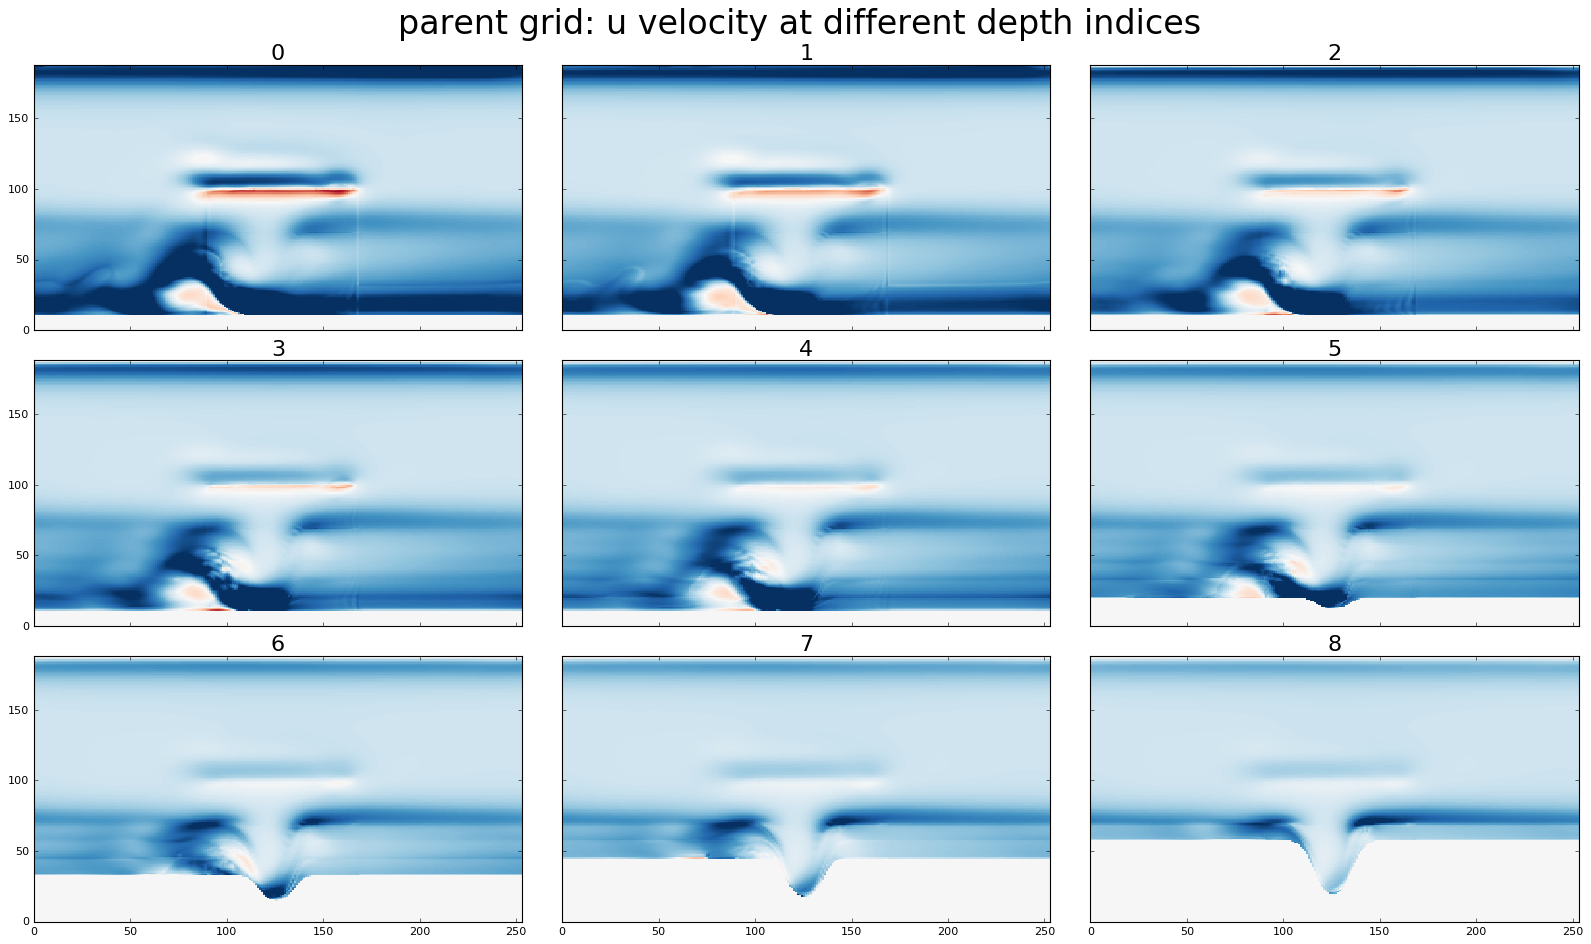

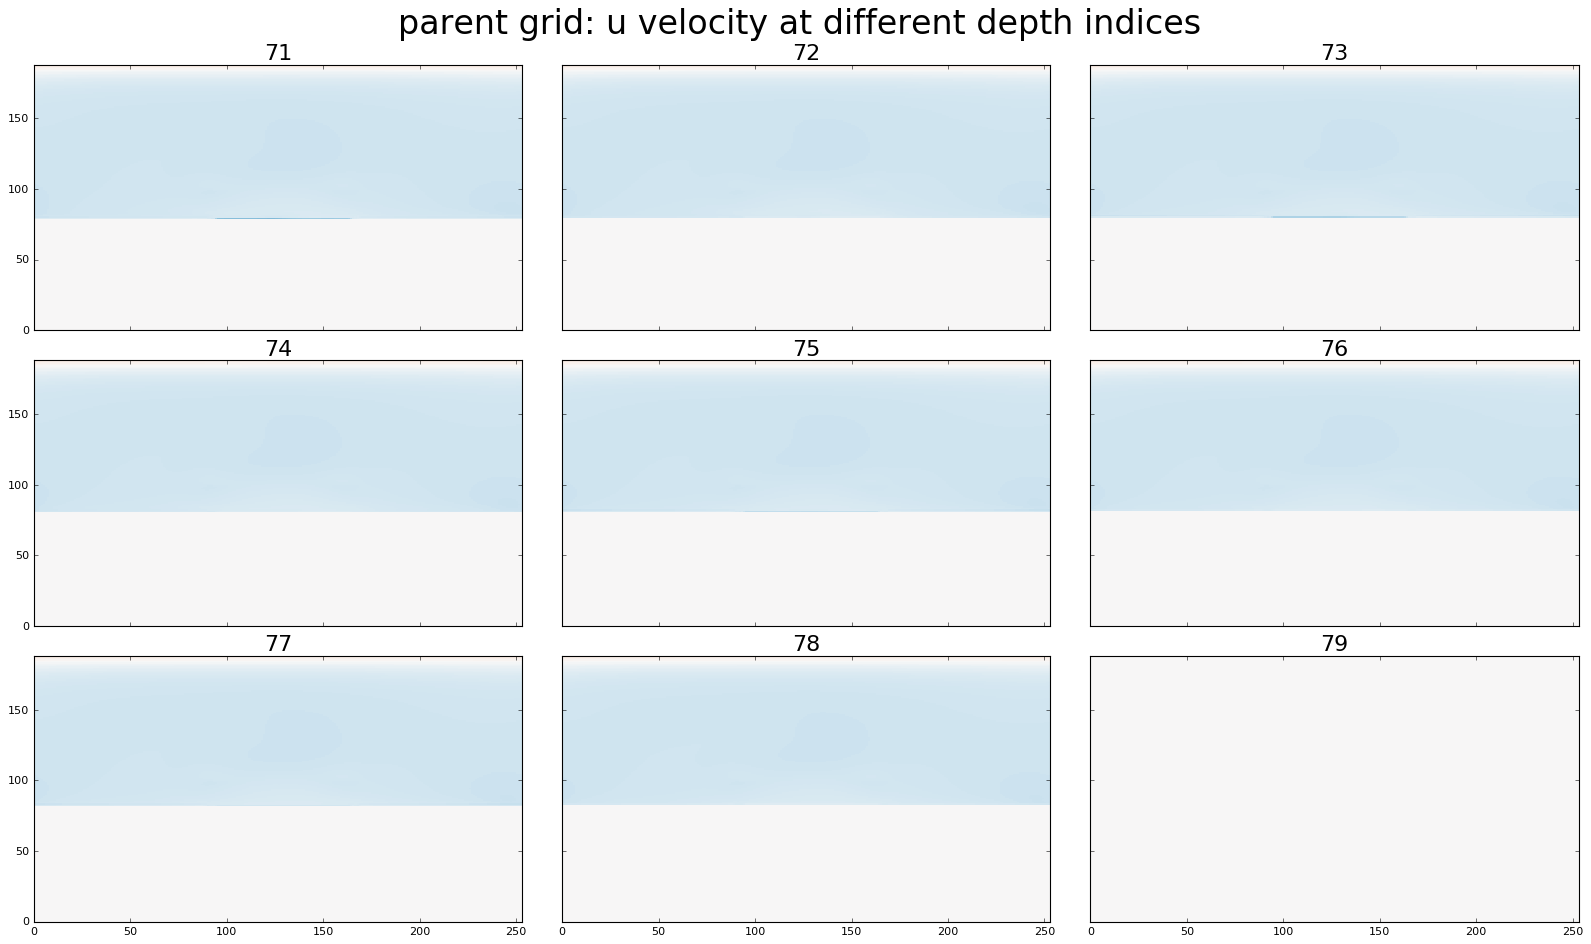

In [3]:
dirname='/home/mdunphy/Canyons/Results/Ideal4T2/'
version = 'parent' # change
lat, lon, deptht, sossheig, votemper, vozocrtx, sozotaux, vomecrty, sometauy, vovecrtz = get_vars(dirname, version)
fig = plot_profiles(vozocrtx, version, np.arange(9))
fig = plot_profiles(vozocrtx, version, np.arange(71, 80))

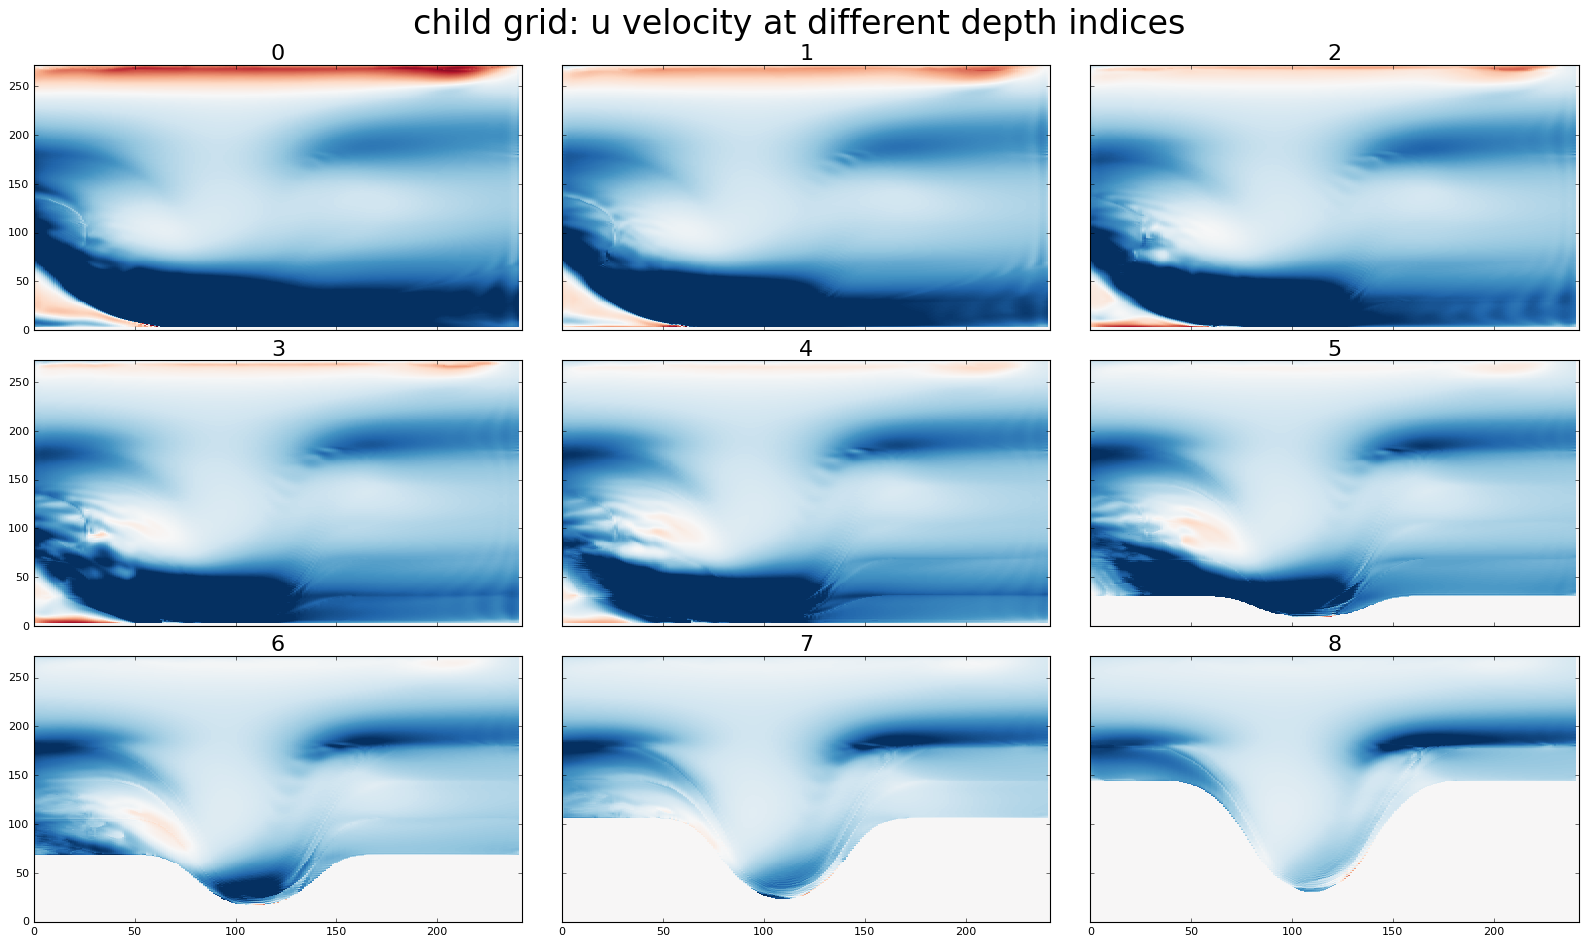

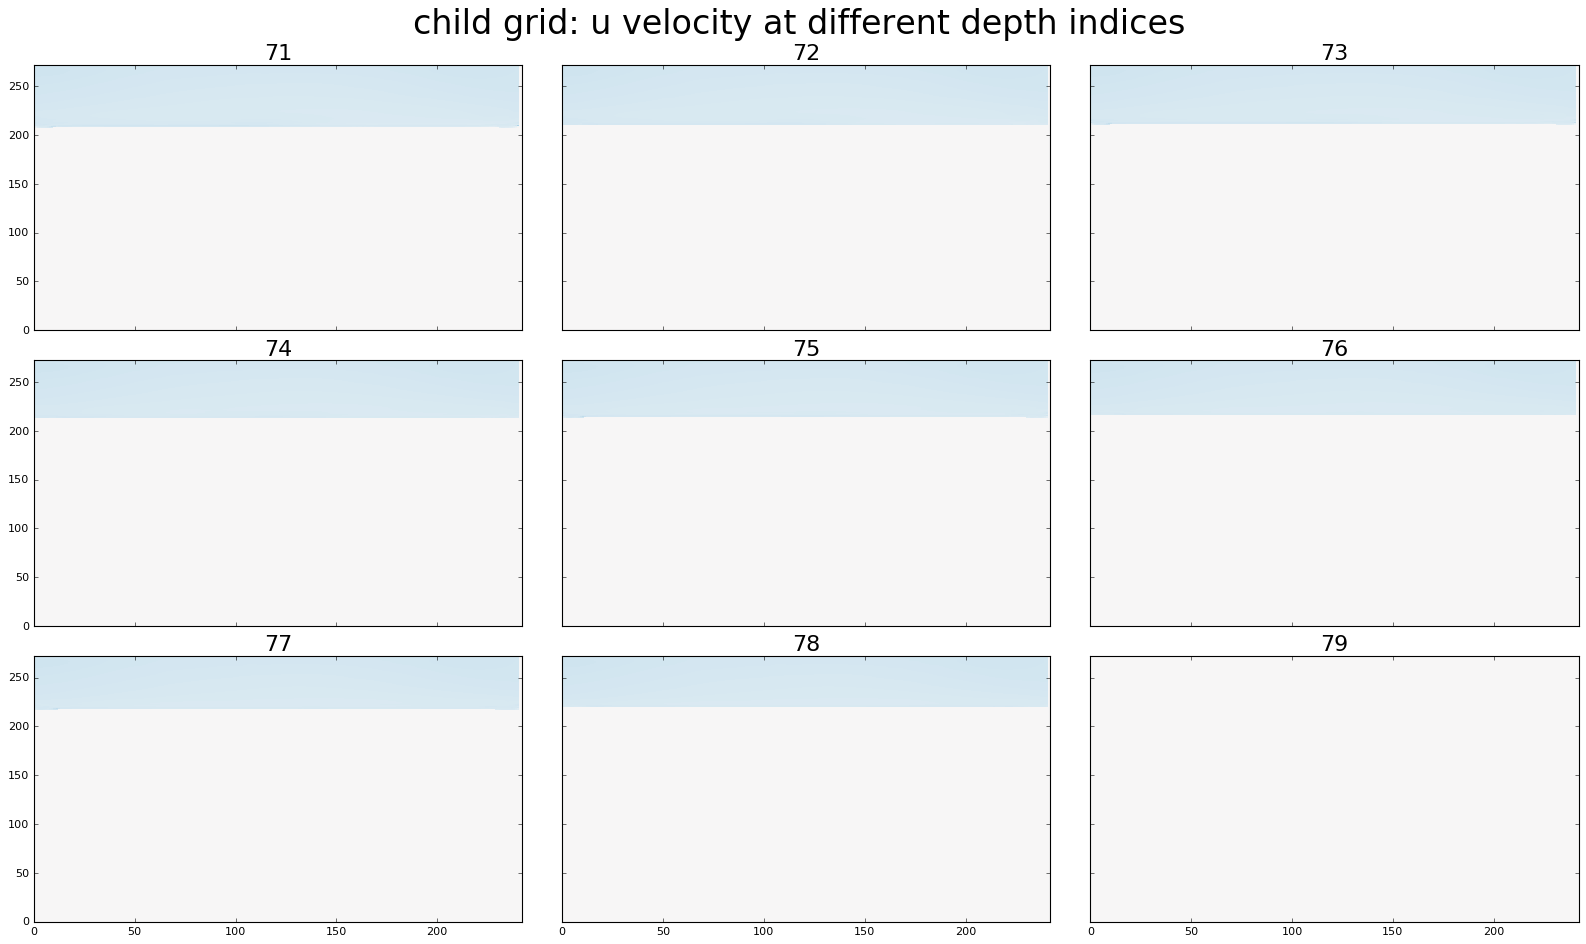

In [4]:
dirname='/home/mdunphy/Canyons/Results/Ideal4T2/'
version = 'child' # change
lat, lon, deptht, sossheig, votemper, vozocrtx, sozotaux, vomecrty, sometauy, vovecrtz = get_vars(dirname, version)
fig = plot_profiles(vozocrtx, version, np.arange(9))
fig = plot_profiles(vozocrtx, version, np.arange(71, 80))

# Cross-sections

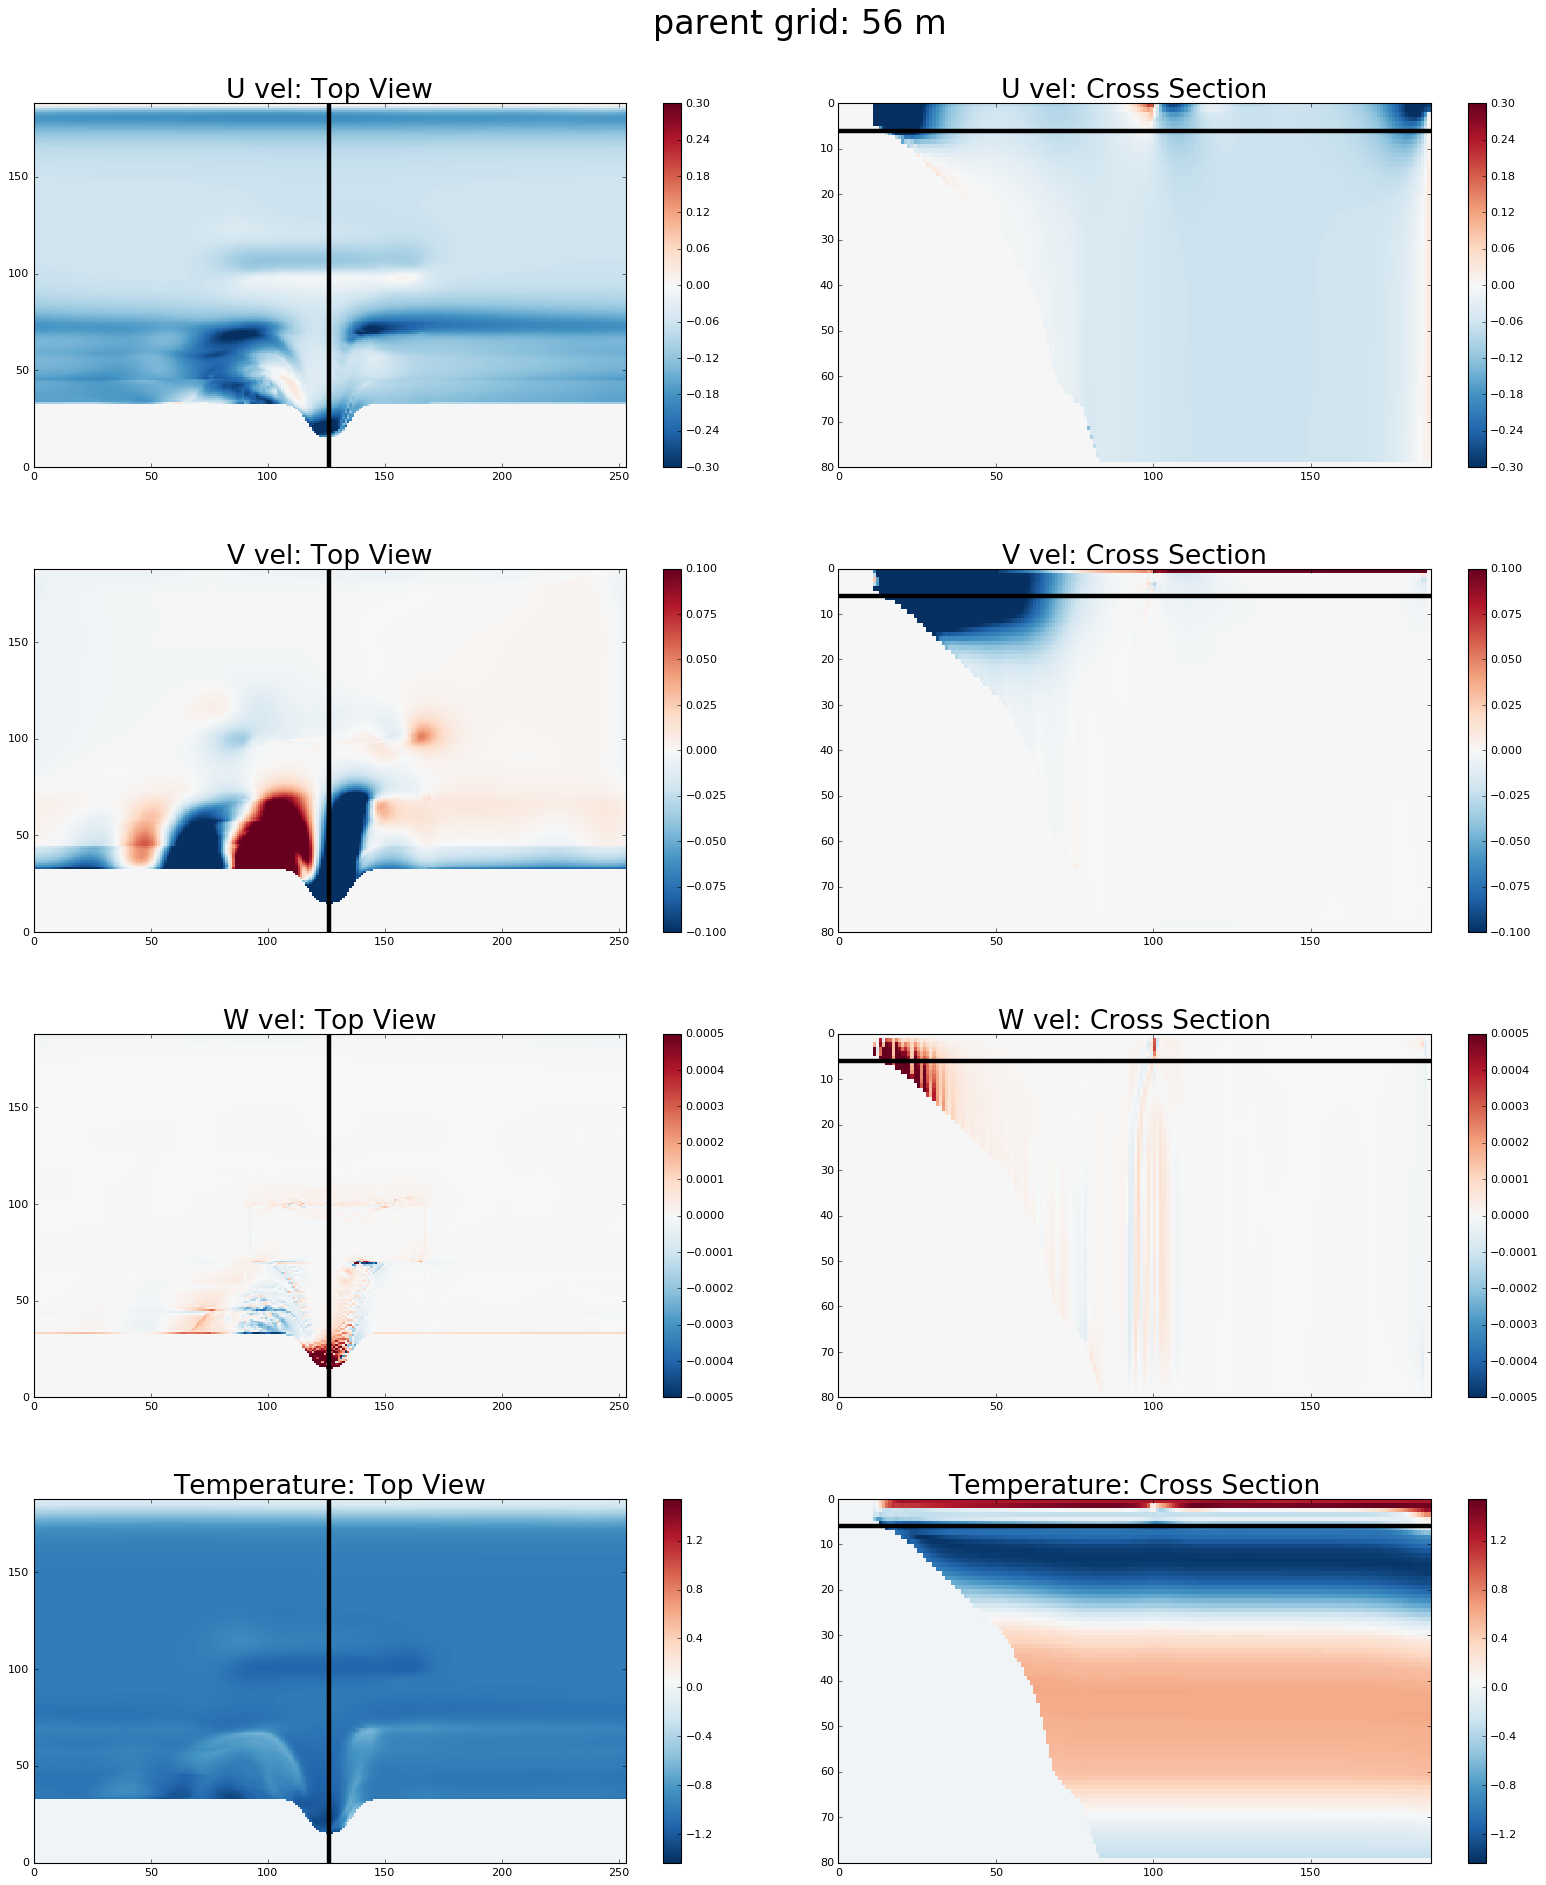

In [5]:
dirname='/home/mdunphy/Canyons/Results/Ideal4T2/'
version = 'parent' # change
lat, lon, deptht, sossheig, votemper, vozocrtx, sozotaux, vomecrty, sometauy, vovecrtz = get_vars(dirname, version)
depth_ind = 6
suptitle = version + ' grid: ' + str(int(deptht[depth_ind])) + ' m'
fig = plot_cross_section(vozocrtx, vomecrty, vovecrtz, votemper, depth_ind, suptitle, version)

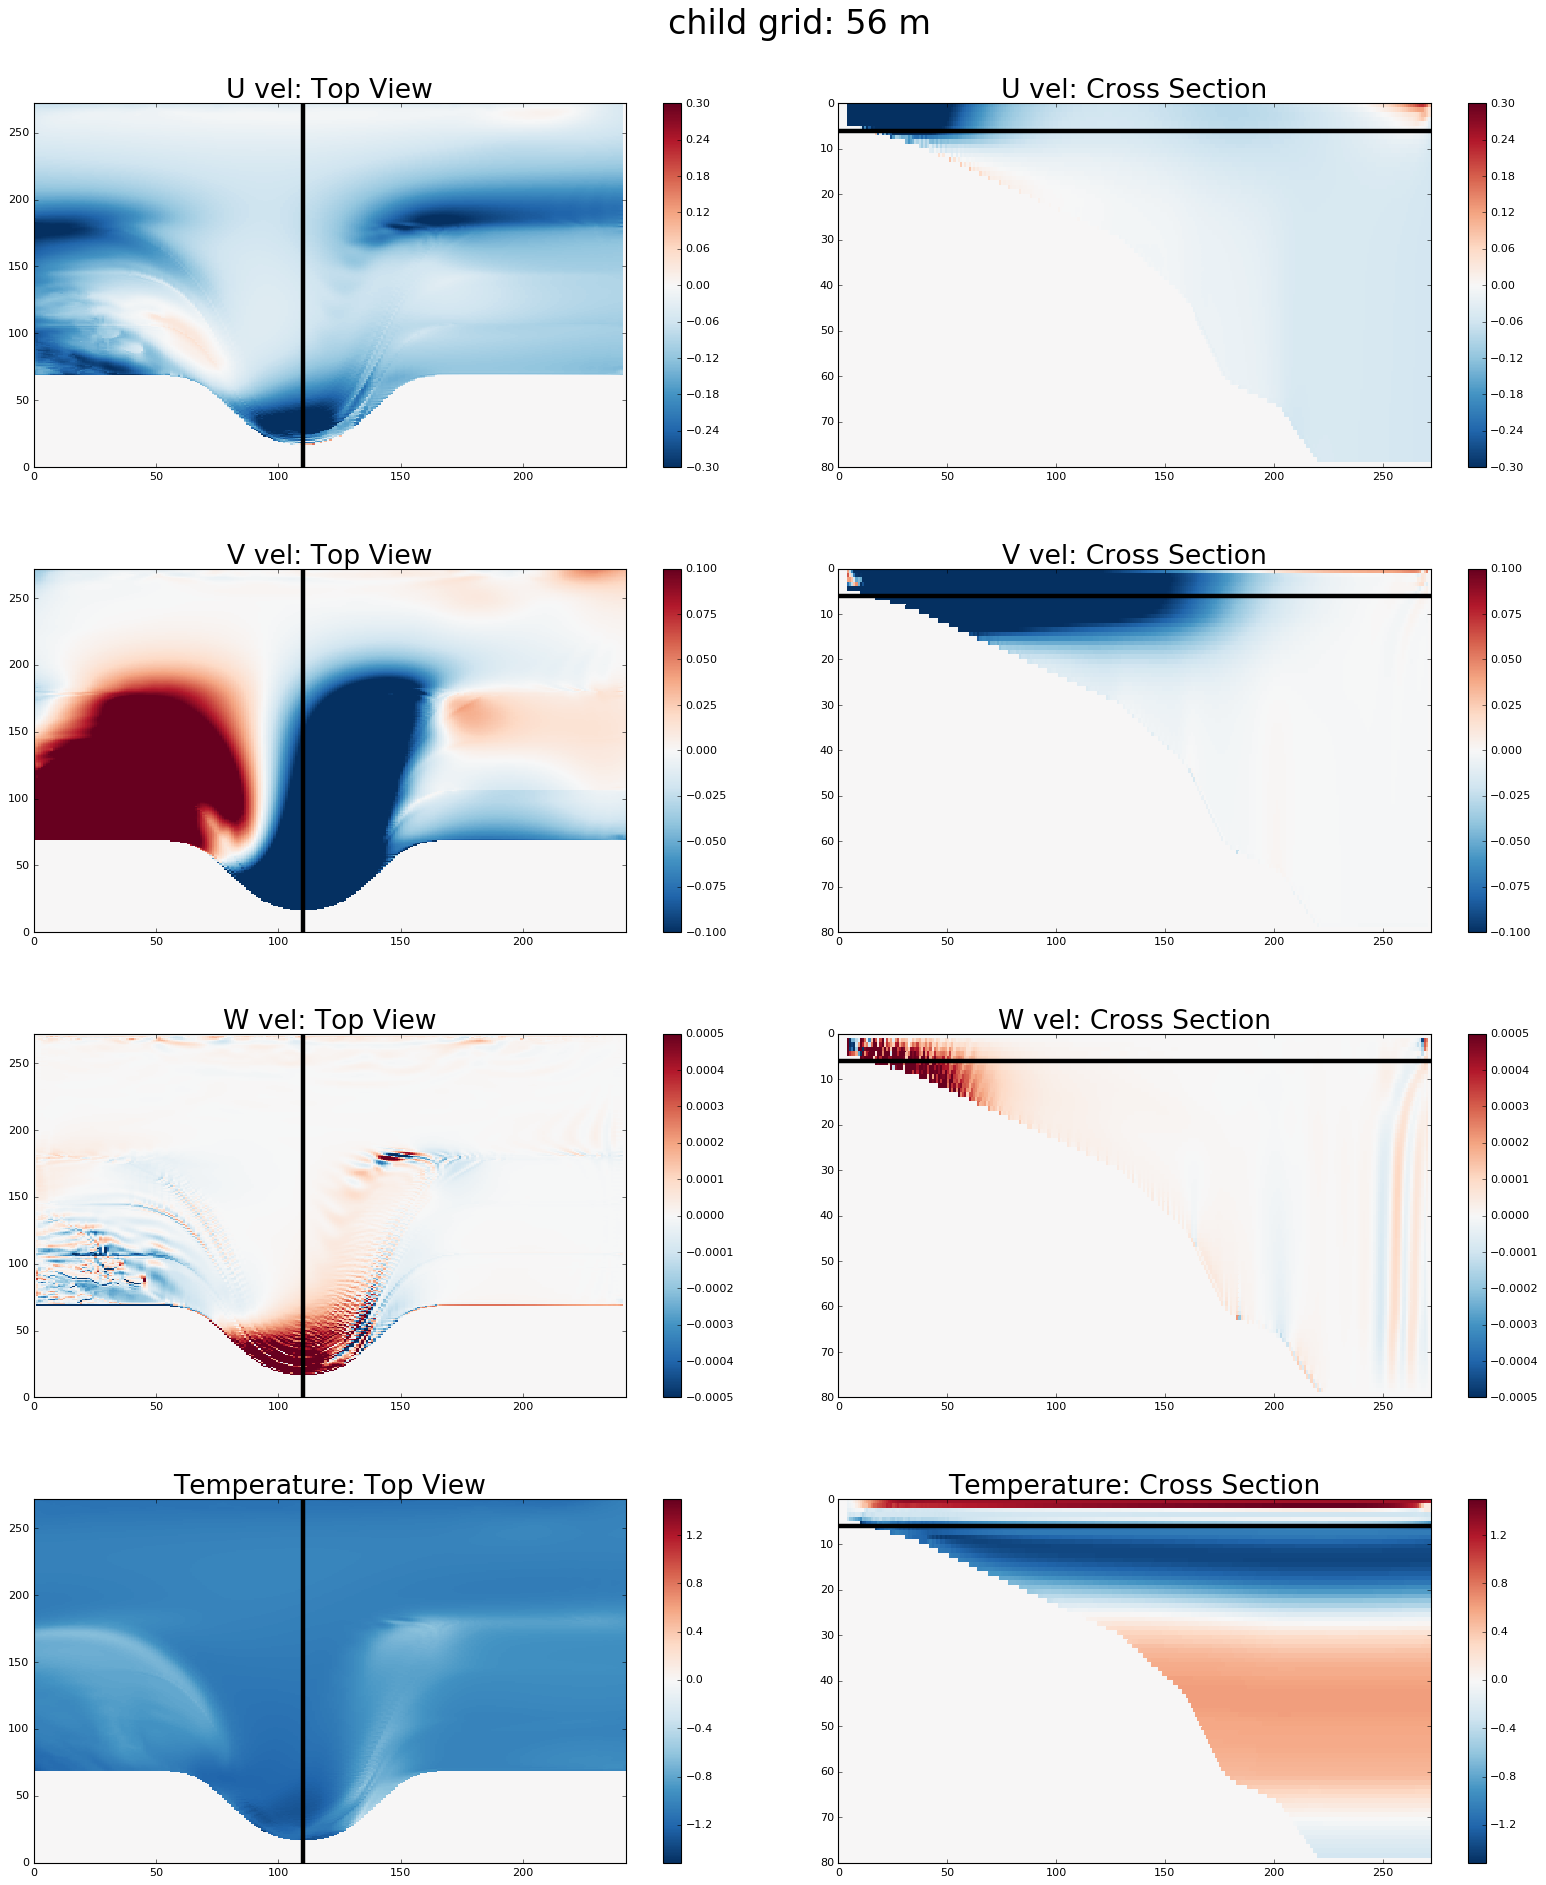

In [6]:
dirname='/home/mdunphy/Canyons/Results/Ideal4T2/'
version = 'child' # change
lat, lon, deptht, sossheig, votemper, vozocrtx, sozotaux, vomecrty, sometauy, vovecrtz = get_vars(dirname, version)
depth_ind = 6
suptitle = version + ' grid: ' + str(int(deptht[depth_ind])) + ' m'
fig = plot_cross_section(vozocrtx, vomecrty, vovecrtz, votemper, depth_ind, suptitle, version)